In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [4]:
speech=open(r'modibihar.txt','r+').read()

In [6]:
# Create tokenizer
# Tokenizing without punctation - 'r\w+'
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|.')

# tokenize text
tokens = tokenizer.tokenize(speech)

In [7]:
# get the list of peoples and places (proper nouns) mentioned in the speech
persons_things=[]

for t in tokens:
    if (tokens[(tokens.index(t)-1)]!='.') & ((t.capitalize()==t) | (t.isupper())):
        persons_things.append(t)

In [8]:
# removing names of peoples and places from the text
tok=[tk for tk in tokens if tk not in persons_things]

In [9]:
# making all words lowercase
toklow=[x.lower() for x in tok]

In [10]:
# getting list of english stopwords,that is,words like am,you etc.
stopwords=stopwords.words('english')

In [12]:
toklow_ns=[to for to in toklow if to not in stopwords]

In [14]:
#remove dots 
toklow_ns_nd=[tn for tn in toklow_ns if tn!='.']

In [15]:
# To lemmatize correctly, we need to find out which words are noun, which verbs etc.
# Clasifying words and saving each word and its respective
# part of speach into words_and_its_part_of_speech
words_and_its_part_of_speech=nltk.pos_tag(toklow_ns_nd)

# saving words together with their location
words_loc=[(word_loc,length) for word_loc,length in zip(
    words_and_its_part_of_speech,list(range(len(words_and_its_part_of_speech)))
)]

# lemmatizing nouns,verbs and adjectives and storing them to
# separate lists, together with their locations

words_loc_noun=[]
words_loc_verb=[]
words_loc_adjective=[]



for pair_of_pairs,length in zip(words_loc,list(range(len(toklow)))):
    if ((pair_of_pairs[0][1]=='NN') | (pair_of_pairs[0][1]=='NNS')\
        | (pair_of_pairs[0][1]=='NNP') |(pair_of_pairs[0][1]=='NNPS')):
        
        words_loc_noun.append((nltk.stem.WordNetLemmatizer()\
                            .lemmatize(pair_of_pairs[0][0],pos='n'),length))
    
    elif ((pair_of_pairs[0][1]=='VB') | (pair_of_pairs[0][1]=='VBN')\
          | (pair_of_pairs[0][1]=='VBG')|(pair_of_pairs[0][1]=='VBD')| \
          (pair_of_pairs[0][1]=='VBP') | (pair_of_pairs[0][1]=='VBZ')):
        
        words_loc_verb.append((nltk.stem.WordNetLemmatizer()\
                            .lemmatize(pair_of_pairs[0][0],pos='v'),length))
        
    elif ((pair_of_pairs[0][1]=='JJ') | (pair_of_pairs[0][1]=='JJR')\
          | (pair_of_pairs[0][1]=='JJS')):
        words_loc_adjective.append((nltk.stem.WordNetLemmatizer()\
                                 .lemmatize(pair_of_pairs[0][0],pos='a'),length))
        

# putting all lemmatized words together
lemmatized=words_loc_noun+words_loc_verb+words_loc_adjective

In [16]:
# sorting lemmatized words by their position in the text
lemmatized_sorted=sorted(lemmatized,key=lambda tup:tup[1])

In [18]:
# extracting words from tuples of words and locations
lemmatized_words=[ls[0] for ls in lemmatized_sorted]

In [20]:
# converting a sorted list of lemmatized words to text
# to generate word cloud later on
text=' '.join(lemmatized_words)

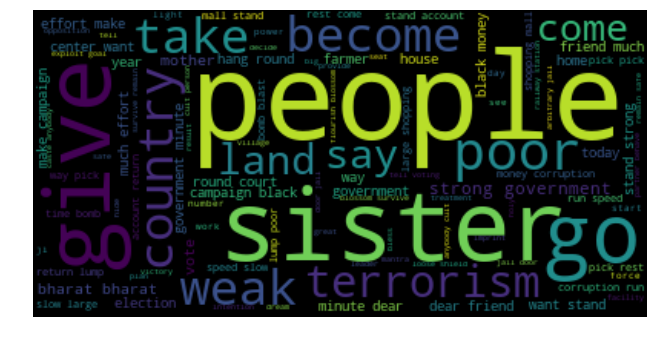

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

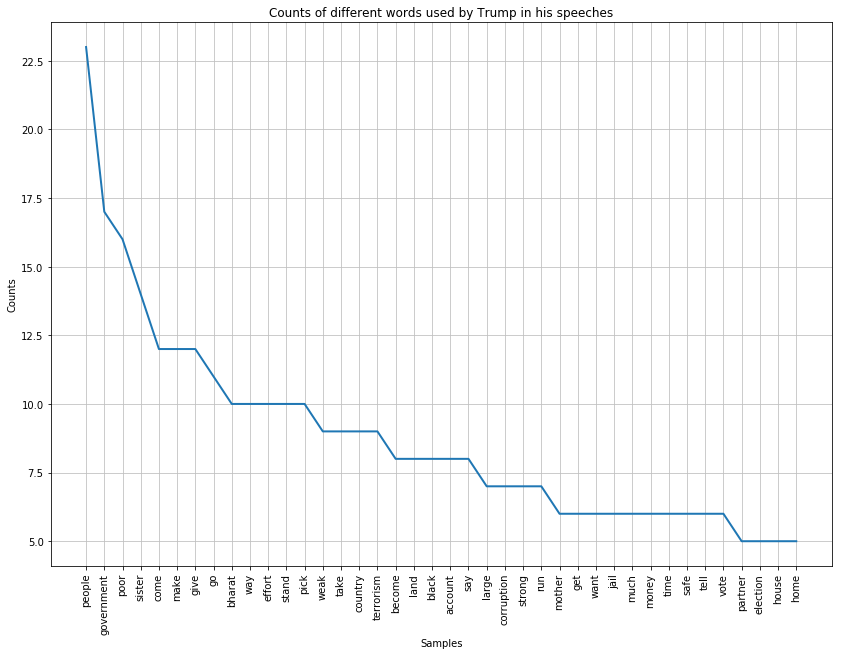

In [22]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(lemmatized_words)

# Plotting the word frequency distribution
plt.figure(figsize=(14,10))
freqdist.plot(40,title='Counts of different words used by Trump in his speeches')


plt.show()
